                              **`FINAL ASSESSMENT AMARINE`**

**Implementasi** **Metode KMeans dan Bounding Box menggunakan Google Collab dengan  bahasa Python**

Mengunggah file dari Komputer lokal ke Google Collab

In [1]:
from google.colab import files

uploaded = files.upload()


Saving final.v1i.tensorflow.zip to final.v1i.tensorflow.zip


Mengecek apakah file berhasil terunggah

In [2]:
import os
print("Isi folder utama setelah upload:", os.listdir("/content"))


Isi folder utama setelah upload: ['.config', 'final.v1i.tensorflow.zip', 'sample_data']


In [3]:
import zipfile

zip_path = "/content/final.v1i.tensorflow.zip"
extract_path = "/content/final_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset berhasil diekstrak ke:", extract_path)
print("Isi folder dataset:", os.listdir(extract_path))


Dataset berhasil diekstrak ke: /content/final_dataset
Isi folder dataset: ['README.dataset.txt', 'train', 'README.roboflow.txt', 'valid', 'test']


Implementasi kode guna menampilkan daftar folder dalam dataset serta beberapa file gambar didalamnya

In [74]:
import os

dataset_path = "/content/final_dataset"

for folder in os.listdir(dataset_path):
    print(f"📂 Folder: {folder}")
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        print("   └──", os.listdir(folder_path)[:5])


📂 Folder: README.dataset.txt
📂 Folder: train
   └── ['1-84-_jpg.rf.b862dbd512a0016bbff981faced73344.jpg', 'Black-winged-hatchetfish-91-_jpg.rf.df5ca587792b2f75d3c41b6e81df9ee9.jpg', '1-150-_jpg.rf.6d2040692ddeb8266f2d10e0eb01a521.jpg', 'celestial-eye-goldfish-155-_jpg.rf.419012bbccdfeecabcd6f741b2e373da.jpg', '1-153-_jpg.rf.25ecdbda6e13bb6bca9f1a30a7b85abe.jpg']
📂 Folder: README.roboflow.txt
📂 Folder: valid
   └── ['Guppy-83-_jpg.rf.138995ac447b873dd9f4a74166562c62.jpg', 'celestial-eye-goldfish-57-_jpg.rf.ab38c4b34290c959823a402cdf8ce3cb.jpg', 'Thalassoma_bifasciatum-38_jpg.rf.5471bd5ba054f42a87639faf86ef92bb.jpg', 'Black-winged-hatchetfish-56-_jpg.rf.060b15b4c90939f298adf14de17ee95b.jpg', 'Thalassoma_bifasciatum-123_jpg.rf.5db551e1d4ba6bbb21a0926b2f0da667.jpg']
📂 Folder: test
   └── ['thalassoma-bifasciatum-juvenile-7-9-cm_jpg.rf.8c9d03666b837fc10c4d68846d2fc9fc.jpg', 'Black-winged-hatchetfish-49-_jpg.rf.d6cbb8eadce2f9b115393cac3709c49c.jpg', 'celestial-eye-goldfish-31-_jpg.rf.fda69ac

Proses pengecekan untuk mencari folder mana yang memuat gambar

In [75]:
train_path = "/content/final_dataset/train"
print("Isi folder train:", os.listdir(train_path)[:10])


Isi folder train: ['1-84-_jpg.rf.b862dbd512a0016bbff981faced73344.jpg', 'Black-winged-hatchetfish-91-_jpg.rf.df5ca587792b2f75d3c41b6e81df9ee9.jpg', '1-150-_jpg.rf.6d2040692ddeb8266f2d10e0eb01a521.jpg', 'celestial-eye-goldfish-155-_jpg.rf.419012bbccdfeecabcd6f741b2e373da.jpg', '1-153-_jpg.rf.25ecdbda6e13bb6bca9f1a30a7b85abe.jpg', '1-17-_jpg.rf.449f6d9a87c04e5b3708009af856607f.jpg', '1-103-_jpg.rf.12fe2a7d0d58c2cff13a7ebe4d145666.jpg', 'Thalassoma_bifasciatum-32_jpg.rf.fe790b8ff716c2c73f12c225f78a79d3.jpg', 'Thalassoma_bifasciatum-18_jpg.rf.b8aabcb6518ceab70a0debe51c3c8ede.jpg', 'Guppy-102-_jpg.rf.a3b37a7949ef29bfca39a45607e06c8c.jpg']


Menampilkan gambar pertama dari data set, menandakan pula lokasi dataset gambar telah ditemukan

✅ 876 gambar ditemukan.


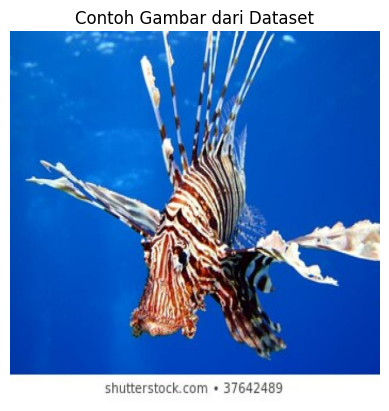

In [76]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

dataset_path = "/content/final_dataset/train"
image_files = [f for f in os.listdir(dataset_path) if f.endswith((".jpg", ".png", ".jpeg"))]

if not image_files:
    print("❌ Tidak ada gambar ditemukan dalam dataset.")
else:
    print(f"✅ {len(image_files)} gambar ditemukan.")

    img_path = os.path.join(dataset_path, image_files[0])
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Contoh Gambar dari Dataset")
    plt.show()


In [77]:
image_path = "C:/Users/NamaUser/Downloads/final_dataset/train/sample.jpg"


Proses membaca gambar dari dataset dan membuat segmentasi menggunakan KMeans

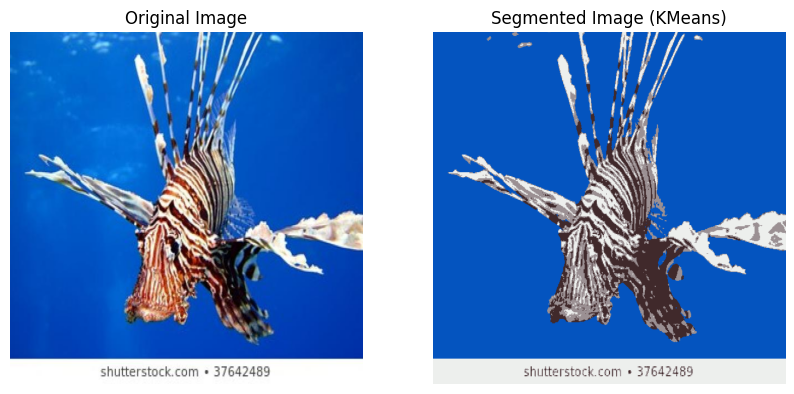

In [78]:
def kmeans_segmentation(image, k=4):
    """
    Menerapkan KMeans clustering pada gambar untuk segmentasi objek.
    """
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    pixels = image.reshape((-1, 3))

    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixels)
    segmented_image = kmeans.cluster_centers_.astype(np.uint8)[labels]

    segmented_image = segmented_image.reshape(image.shape)

    return segmented_image

segmented_img = kmeans_segmentation(img, k=4)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.axis("off")
plt.title("Segmented Image (KMeans)")

plt.show()


In [79]:
!pip install opencv-python matplotlib numpy

Mengecek kembali apakah gambar ditemukan

In [80]:
import cv2
import os
import numpy as np

dataset_path = "/content/final_dataset/train"
image_filename = "1-84-_jpg.rf.b862dbd512a0016bbff981faced73344.jpg"
image_path = os.path.join(dataset_path, image_filename)
print("Apakah gambar ditemukan?", os.path.exists(image_path))

if os.path.exists(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print("Gambar berhasil dimuat!")
else:
    print("File tidak ditemukan, pastikan nama file benar.")

Apakah gambar ditemukan? True
Gambar berhasil dimuat!


Proses membaca hasil segmentasi menggunakan grayscale

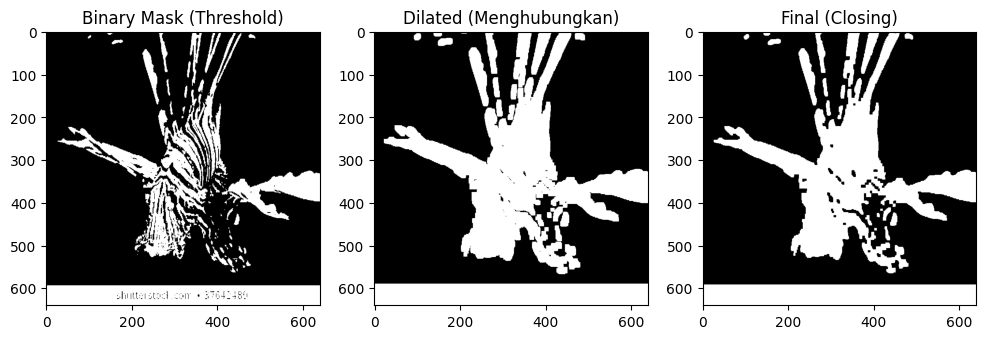

In [85]:
import cv2
import numpy as np

segmented_image = cv2.imread("segmented_image.png", 0)
_, binary_mask = cv2.threshold(segmented_image, 128, 255, cv2.THRESH_BINARY)

kernel = np.ones((5,5), np.uint8)
dilated = cv2.dilate(binary_mask, kernel, iterations=2)
eroded = cv2.erode(dilated, kernel, iterations=1)
closed = cv2.morphologyEx(eroded, cv2.MORPH_CLOSE, kernel)

cv2.imwrite("cleaned_segmentation.png", segmented_image)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(binary_mask, cmap='gray')
ax[0].set_title("Binary Mask (Threshold)")

ax[1].imshow(dilated, cmap='gray')
ax[1].set_title("Dilated (Menghubungkan)")

ax[2].imshow(closed, cmap='gray')
ax[2].set_title("Final (Closing)")

plt.show()

Proses deteksi objek dengan Bounding Box setelah segmentasi gambar menggunakan OpenCV

✅ 876 gambar ditemukan.
Jumlah kontur terdeteksi: 5


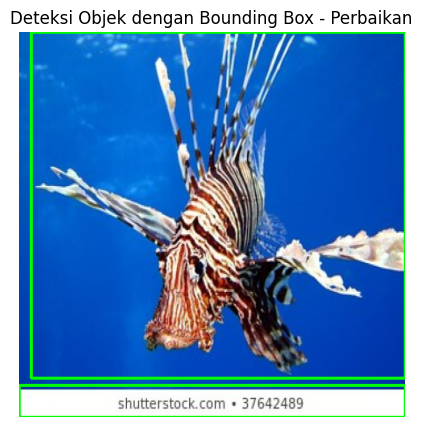

In [82]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

dataset_path = "/content/final_dataset/train"
image_files = [f for f in os.listdir(dataset_path) if f.endswith((".jpg", ".png", ".jpeg"))]

if not image_files:
    print("❌ Tidak ada gambar ditemukan dalam dataset.")
else:
    print(f"✅ {len(image_files)} gambar ditemukan.")

    img_path = os.path.join(dataset_path, image_files[0])
    if not os.path.exists(img_path):
      print(f"❌ Gambar pada path: {img_path} tidak ditemukan.")

    original_image = cv2.imread(img_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    segmented_image_path = "segmented_image.png"
    segmented_image = cv2.imread(segmented_image_path, 0)
    if segmented_image is None:
        raise FileNotFoundError("Gambar segmentasi tidak ditemukan!")
    _, binary_mask = cv2.threshold(segmented_image, 128, 255, cv2.THRESH_BINARY)

    kernel = np.ones((10, 10), np.uint8)
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)
    binary_mask = cv2.dilate(binary_mask, kernel, iterations=2)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print(f"Jumlah kontur terdeteksi: {len(contours)}")

    min_area = 2000
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

    for contour in filtered_contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(original_image, (x, y), (x + w, y + h), (0, 255, 0), 3)

    plt.figure(figsize=(10, 5))
    plt.imshow(original_image)
    plt.title("Deteksi Objek dengan Bounding Box - Perbaikan")
    plt.axis("off")
    plt.show()